In [ ]:
import pandas as pd
from random import randrange, uniform
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38           8150        172  1.0              
jaceprater/smokers-health-data                                   Smoker's Health Data                              29KB  2024-04-20 17:09:38           1698         25  1.0              
mexwell/heart-disease-dataset                                    🫀 Heart Disease Dataset                          399KB  2024-04-08 09:43:49           4163         73  1.0              
sujithmandala/second-hand-car-price-prediction                   Secon

In [ ]:
!kaggle datasets download -d abdullahorzan/moodify-dataset

 61% 17.0M/27.7M [00:00<00:00, 21.5MB/s]
100% 27.7M/27.7M [00:00<00:00, 34.6MB/s]


In [ ]:
# Directorio para descomprimir los datos
!mkdir my_dataset

In [ ]:
!ls

drive  kaggle.json  moodify-dataset.zip  my_dataset  sample_data


In [ ]:
!unzip moodify-dataset -d my_dataset

Archive:  moodify-dataset.zip
  inflating: my_dataset/278k_labelled_uri.csv  
  inflating: my_dataset/278k_song_labelled.csv  


In [ ]:
BASE_PATH = '/content/my_dataset/'

In [ ]:
import os
for image_class in os.listdir(BASE_PATH):
    print(image_class)

278k_labelled_uri.csv
278k_song_labelled.csv


In [ ]:
df = pd.read_csv('/content/my_dataset/278k_song_labelled.csv')

In [ ]:
df.head(5)

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [ ]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'labels']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      277938 non-null  float64
 1   danceability      277938 non-null  float64
 2   energy            277938 non-null  float64
 3   instrumentalness  277938 non-null  float64
 4   liveness          277938 non-null  float64
 5   loudness          277938 non-null  float64
 6   speechiness       277938 non-null  float64
 7   valence           277938 non-null  float64
 8   tempo             277938 non-null  float64
 9   labels            277938 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 21.2 MB


([<matplotlib.patches.Wedge at 0x7b9be86efdf0>,
 [Text(0.39552649073125107, 1.0264301218932645, '1'),
  Text(-1.0798067320685631, -0.2098032921081321, '0'),
  Text(0.08857999754293282, -1.0964276465117497, '2'),
  Text(0.9761522223791959, -0.507076758237012, '3')],
 [Text(0.21574172221704602, 0.5598709755781442, '38.29'),
  Text(-0.5889854902192162, -0.1144381593317084, '29.52'),
  Text(0.048316362296145166, -0.5980514435518633, '16.93'),
  Text(0.5324466667522886, -0.2765873226747338, '15.25')])

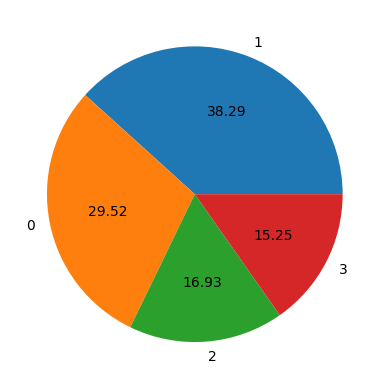

In [ ]:
a = df['labels'].value_counts()
plt.pie(a.values, labels = a.index, autopct='%.2f')

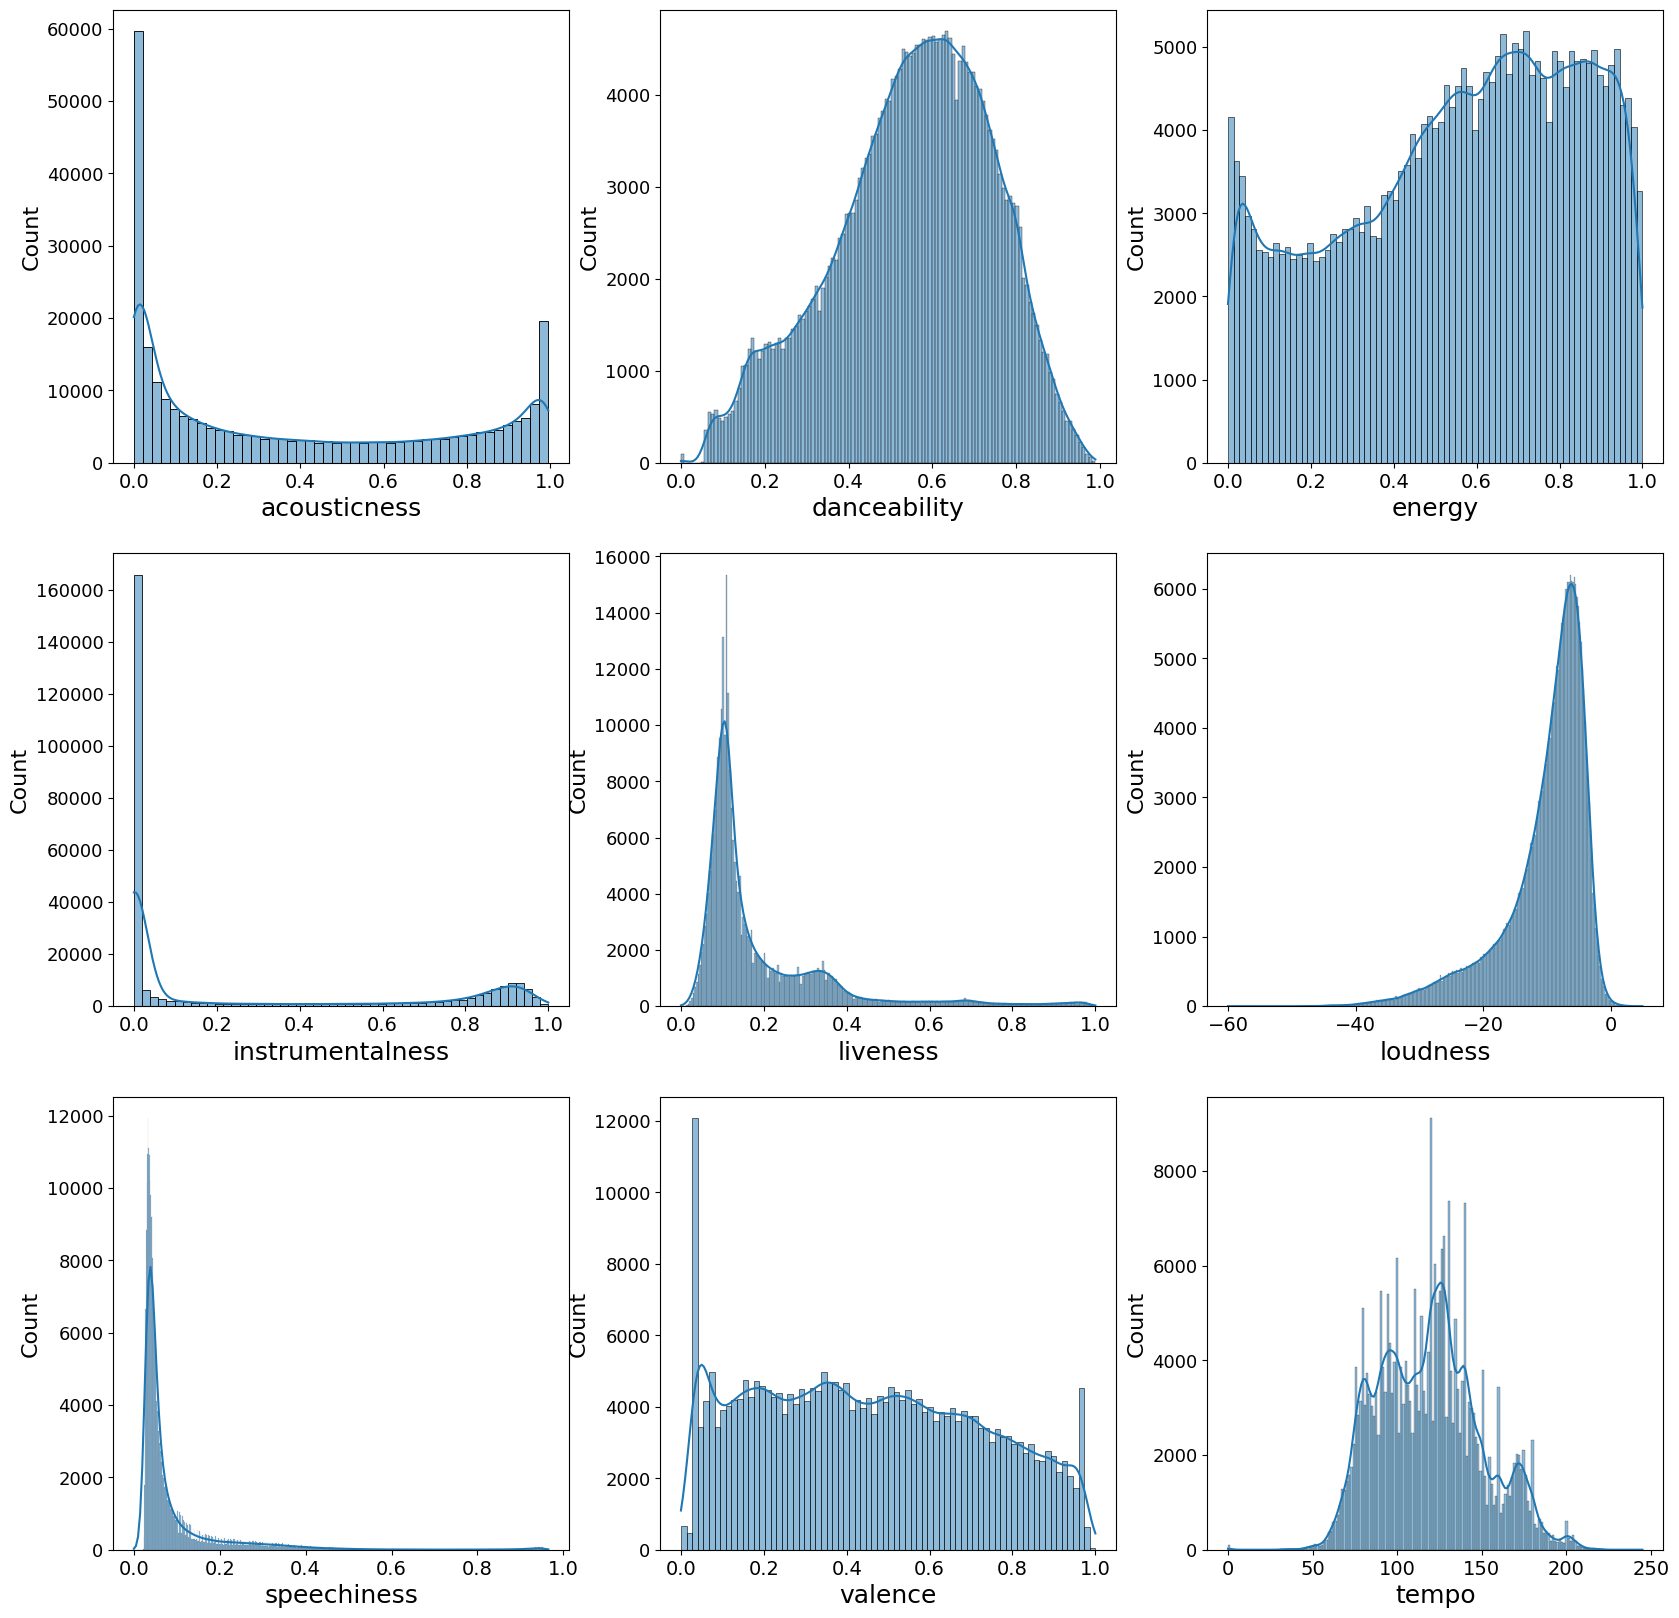

In [ ]:
plt.figure(figsize=(20,20))
for i in range(len(df.columns)-1):
    plt.subplot(3,3, i+1)
    sns.histplot(df[df.columns[i]], kde=True)
    plt.xlabel(df.columns[i], fontsize=18)
    plt.ylabel('Count', fontsize=16)
    plt.tick_params(axis='y', which='major', labelsize=13)
    plt.tick_params(axis='x', which='major', labelsize=14)


plt.show()

In [ ]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

In [ ]:
column_name = df.columns
print("Old Shape: ", df.shape)
print("Percentage of Outlier")
for i in range(len(column_name)-1):
    Q1 = df[column_name[i]].quantile(0.25)
    Q3 = df[column_name[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    upper_array = np.where(df[column_name[i]]>=upper)[0]
    lower_array = np.where(df[column_name[i]]<=lower)[0]

    print(column_name[i] + ": ", (len(upper_array) + len(lower_array))/len(df) * 100)

Old Shape:  (277938, 10)
Percentage of Outlier
acousticness:  0.0
danceability:  0.03238132245320899
energy:  0.0
instrumentalness:  0.0
liveness:  7.342284970029287
loudness:  6.529873568925444
speechiness:  13.47386827278026
valence:  0.0
tempo:  0.26804539141823


In [ ]:
import pandas as pd

def remove_outliers_IQR(data):
    outliers_porcentaje = {}
    new_data = pd.DataFrame()

    # Iterar sobre cada columna del DataFrame
    for column in data.columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        # Sustituir los valores que están por debajo del límite inferior por el mínimo
        filtered_column = data[column].where(data[column] >= lower_bound, data[column].min())

        # Sustituir los valores que están por encima del límite superior por el máximo
        filtered_column = filtered_column.where(filtered_column <= upper_bound, data[column].max())

        # Calcular el porcentaje de outliers para esta columna
        outliers_percent = ((data[column].size - filtered_column.size) / data[column].size) * 100
        outliers_porcentaje[column] = outliers_percent

        new_data[column] = filtered_column

    return new_data, outliers_porcentaje

datos_sin_outliers, outliers_porcentaje = remove_outliers_IQR(df)

In [ ]:
dff = datos_sin_outliers
dff

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,labels
0,0.01690,0.611,0.614,0.000794,1.0000,-8.815,0.0672,0.520,128.050,2
1,0.01180,0.638,0.781,0.009530,0.3490,-6.848,0.0285,0.250,122.985,1
2,0.00710,0.560,0.810,0.000008,0.2410,-8.029,0.0872,0.247,170.044,1
3,0.01780,0.525,0.699,0.000088,0.0888,-4.571,0.0353,0.199,92.011,0
4,0.36500,0.367,0.771,0.000001,0.0965,-5.863,0.1060,0.163,115.917,1
...,...,...,...,...,...,...,...,...,...,...
277933,0.12600,0.777,0.725,0.010800,0.0917,-9.012,0.0470,0.851,128.349,1
277934,0.08530,0.543,0.482,0.000092,0.1110,-12.789,0.9650,0.415,193.513,1
277935,0.01150,0.527,0.942,0.000000,0.1880,-5.640,0.0366,0.495,148.723,2
277936,0.09640,0.768,0.829,0.000029,0.0970,-5.109,0.0313,0.962,118.773,1


In [ ]:
df_ = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]
dff_ = dff[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]

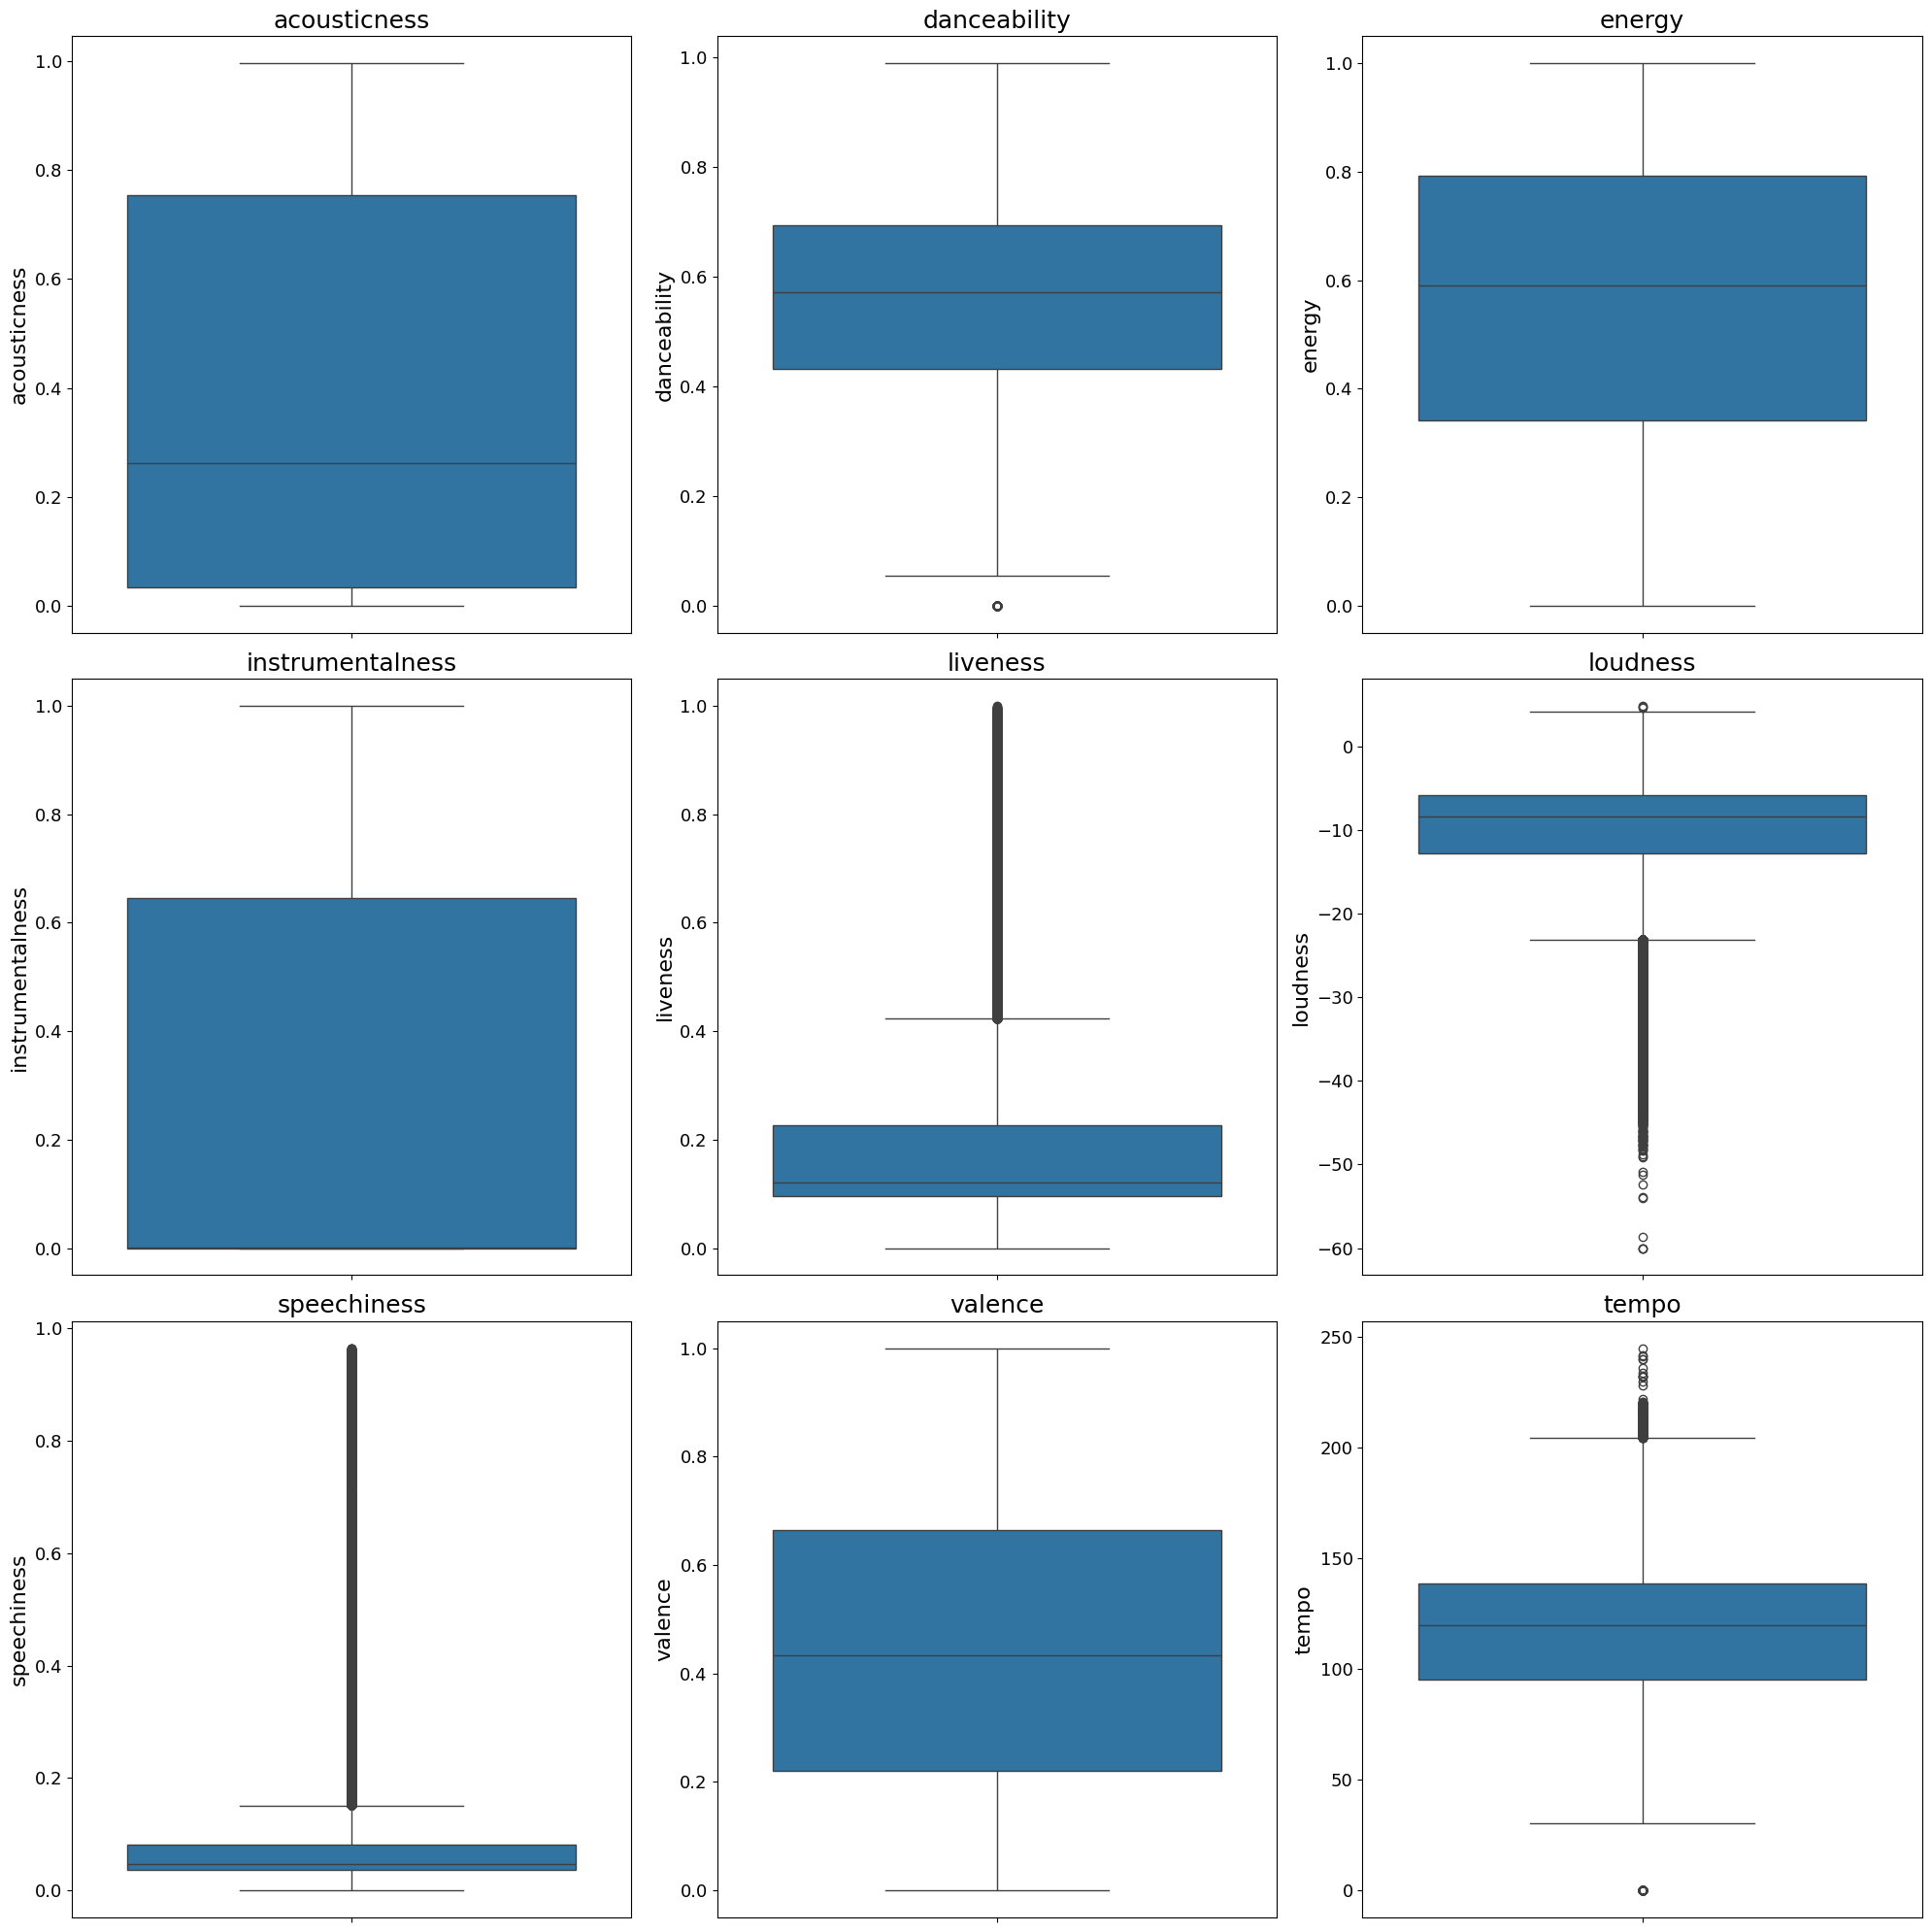

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))

# Iterar sobre cada columna del DataFrame
for i in range(len(df_.columns)):
    plt.subplot(3, 3, i+1)
    plt.title(df_.columns[i], fontsize=18)

    # Dibujar el boxplot de la columna actual
    sns.boxplot(df_[df_.columns[i]])
    plt.ylabel(df.columns[i], fontsize=16)
    plt.tick_params(axis='y', which='major', labelsize=13)
    plt.tick_params(axis='x', which='major', labelsize=14)


plt.tight_layout()
plt.show()

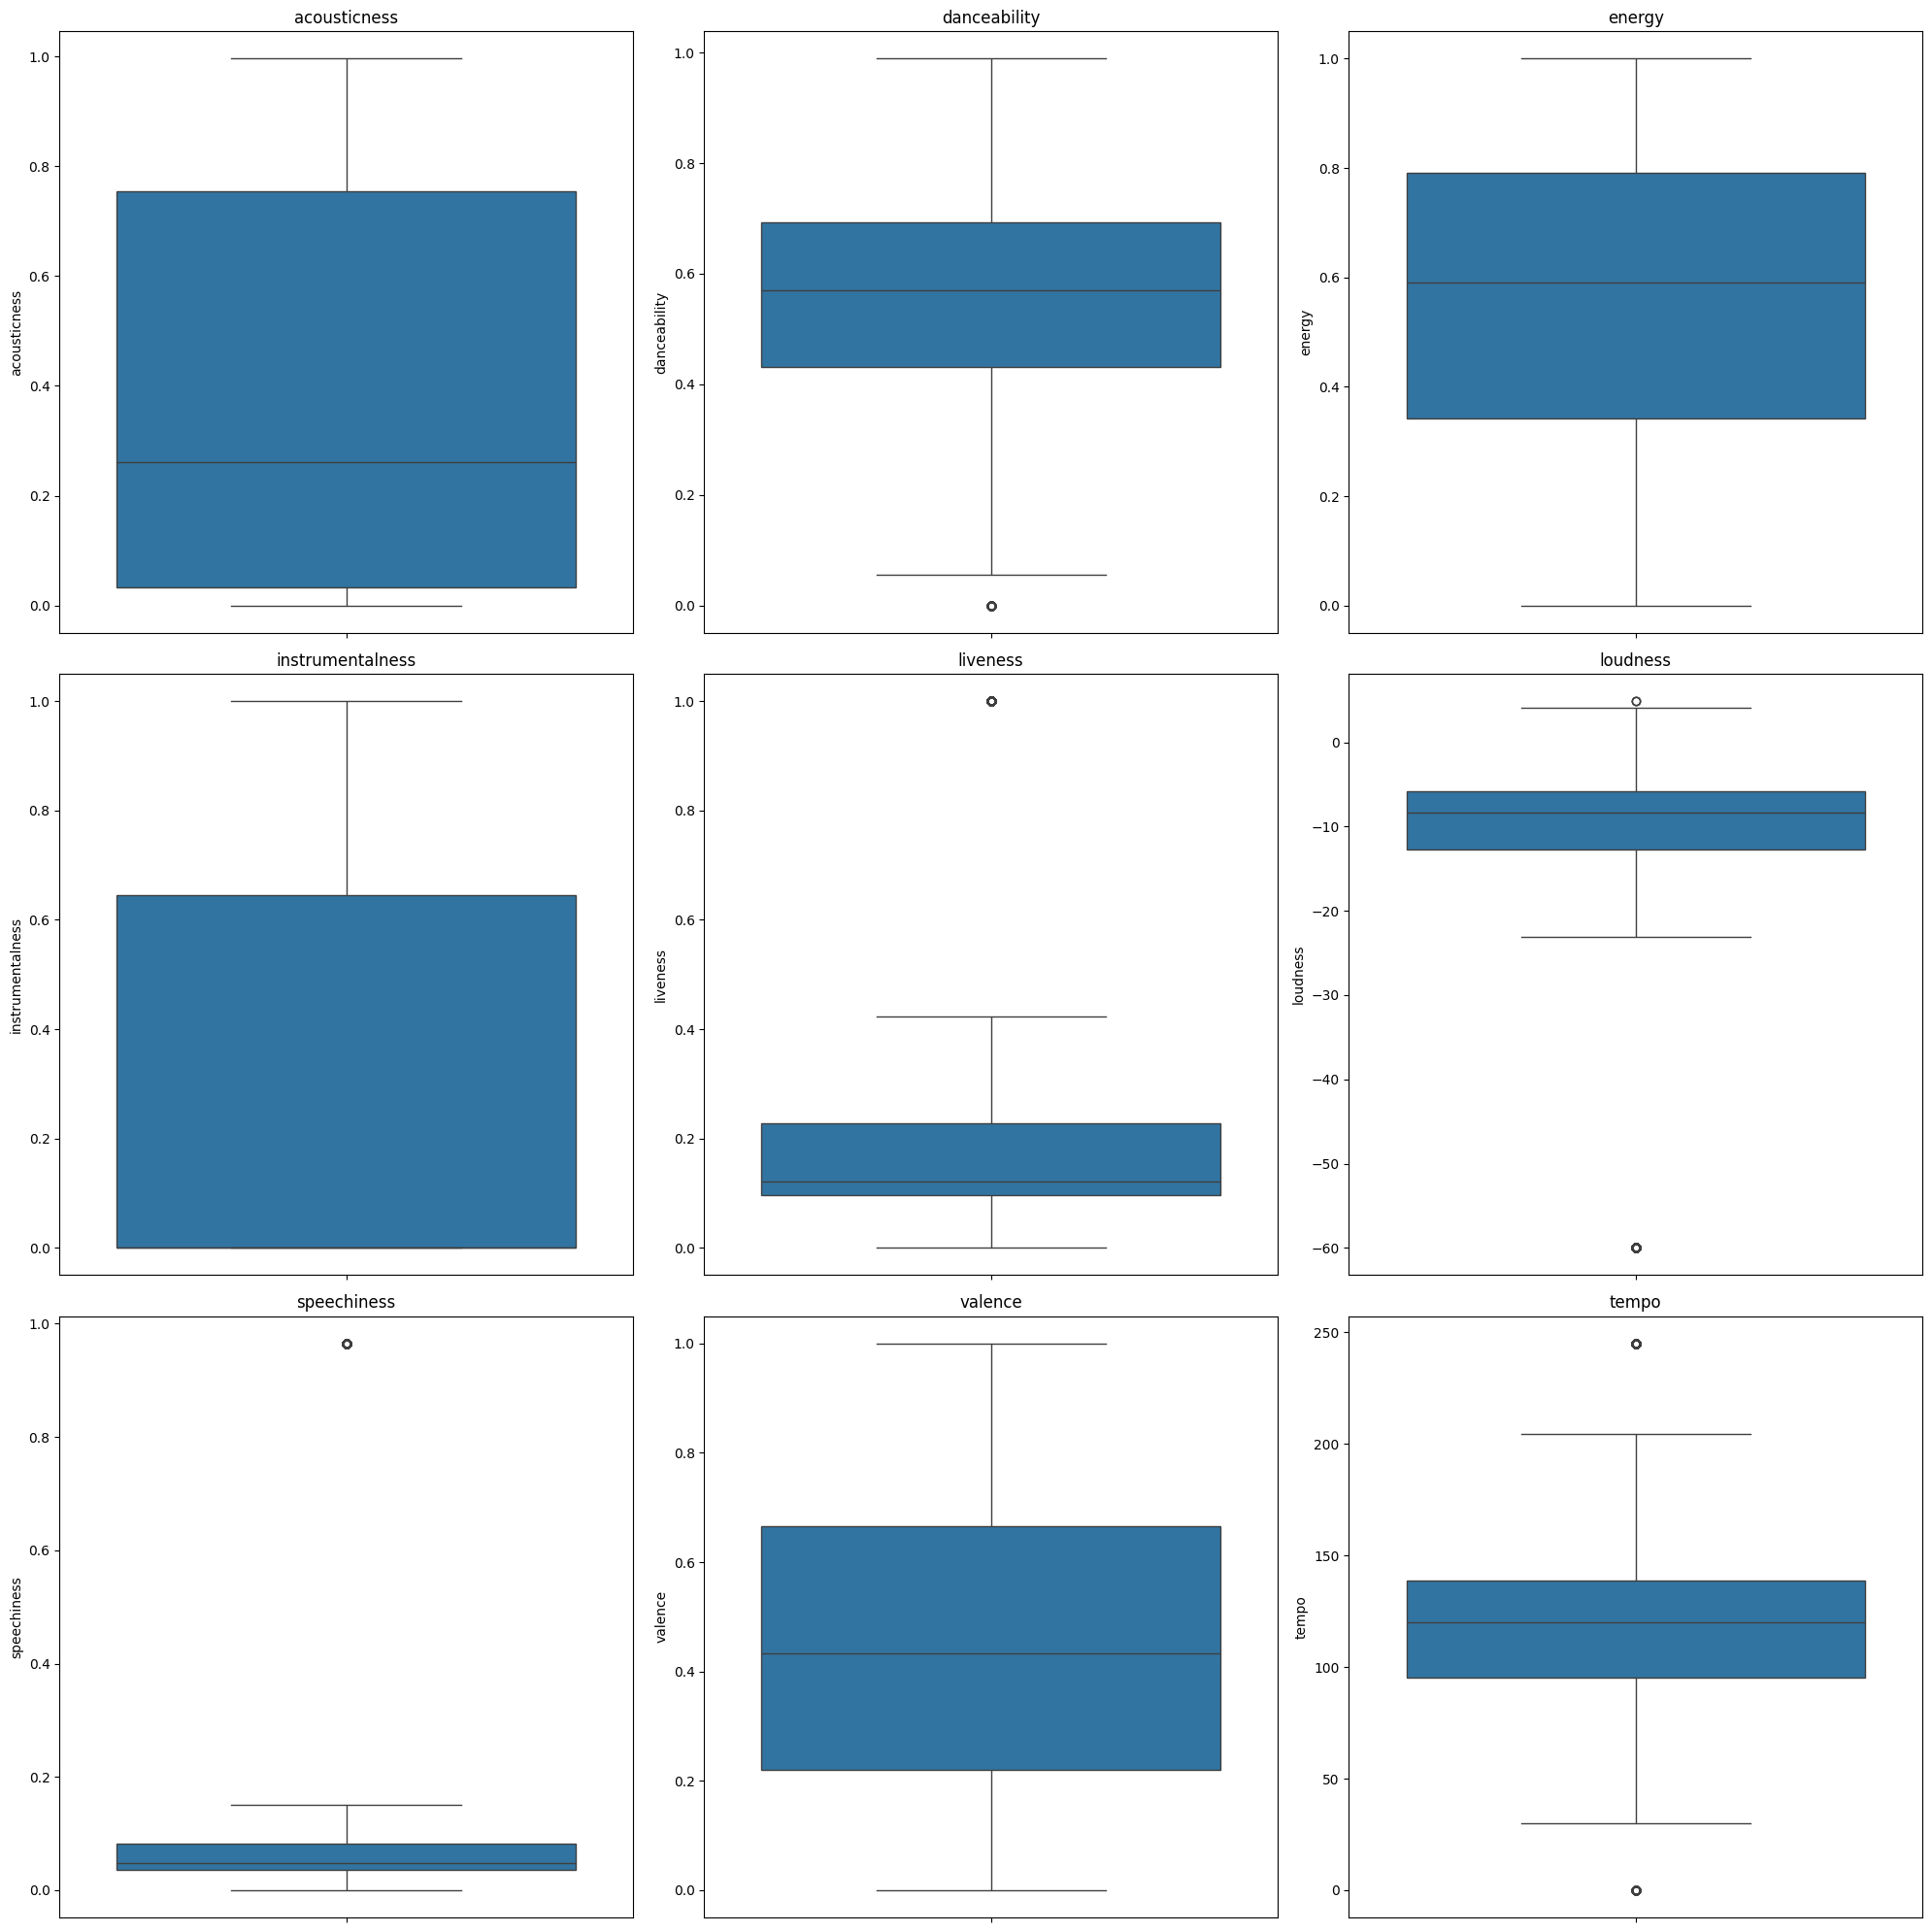

In [ ]:
plt.figure(figsize=(20, 20))

# Iterar sobre cada columna del DataFrame
for i in range(len(dff_.columns)):
    plt.subplot(3, 3, i+1)
    plt.title(dff_.columns[i])

    # Dibujar el boxplot de la columna actual
    sns.boxplot(dff_[dff_.columns[i]])


plt.tight_layout()
plt.show()

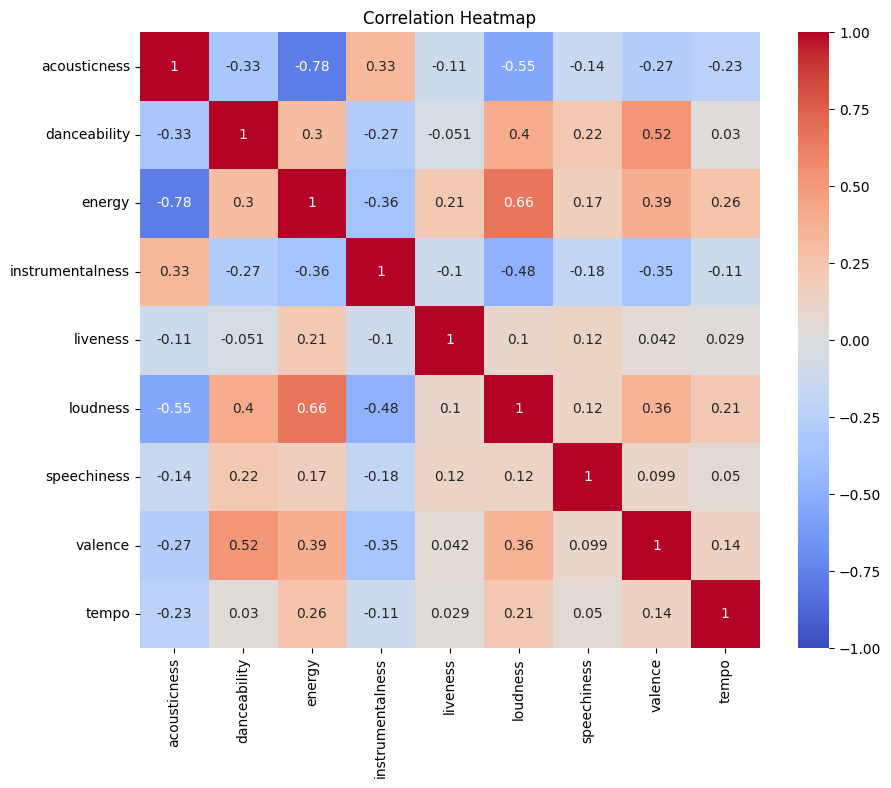

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
corr_matrix = dff[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
def calcular_intervalo_y_media(x):
    intervalo = f"{x.min()}-{x.max()}"
    media = x.mean()
    return f"{intervalo} (Media: {media})"

# Agrupar por etiquetas y calcular el intervalo de valores y la media para cada columna
intervalo_y_media_por_etiqueta = df.groupby('labels').agg(calcular_intervalo_y_media)

print("Intervalos de valores y media por etiqueta:")
print(intervalo_y_media_por_etiqueta)

Intervalos de valores y media por etiqueta:
                                      acousticness  \
labels                                               
0            0.0-0.996 (Media: 0.5844172830429696)   
1       1.52e-06-0.995 (Media: 0.2101315311747738)   
2           0.0-0.991 (Media: 0.03276653647083821)   
3            0.0-0.996 (Media: 0.8395148279205398)   

                                    danceability  \
labels                                             
0          0.0-0.985 (Media: 0.5046586316995296)   
1       0.0575-0.989 (Media: 0.6775762376795798)   
2         0.0-0.987 (Media: 0.49923642409433766)   
3          0.0-0.986 (Media: 0.3907498183362431)   

                                           energy  \
labels                                              
0             0.0-1.0 (Media: 0.3967316230263959)   
1        0.000353-1.0 (Media: 0.6909793714964906)   
2         0.00185-1.0 (Media: 0.8698095368107936)   
3       2.02e-05-1.0 (Media: 0.18263914201151324)   


In [ ]:
sad = dff[dff['labels'] == 0]
happy = dff[dff['labels'] == 1]
energetic = dff[dff['labels'] == 2]
calm = dff[dff['labels'] == 3]

In [ ]:
sad = sad[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]
happy = happy[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]
energetic = energetic[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]
calm = calm[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]

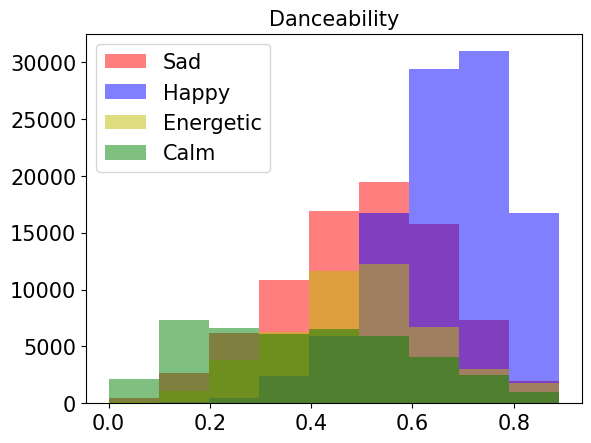

In [ ]:
min_danceability = min(min(sad['danceability']), min(happy['danceability']), min(energetic['danceability']), min(calm['danceability']))
max_danceability = max(max(sad['danceability']), max(happy['danceability']), max(energetic['danceability']), max(calm['danceability']))

bins_danceability = np.arange(min_danceability, max_danceability, ((max_danceability-min_danceability)/10))

plt.figure()
plt.title('Danceability',fontsize=15)

plt.hist(sad['danceability'], bins=bins_danceability, alpha = 0.5, color= 'r')

plt.hist(happy['danceability'], bins=bins_danceability, alpha = 0.5, color= 'b')

plt.hist(energetic['danceability'], bins=bins_danceability, alpha = 0.5, color= 'y')

plt.hist(calm['danceability'], bins=bins_danceability, alpha = 0.5, color= 'g')

plt.legend(('Sad', 'Happy', 'Energetic', 'Calm'),fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

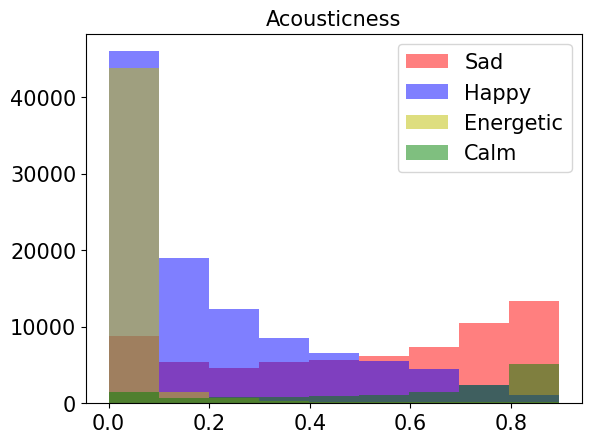

In [ ]:
min_acousticness = min(min(sad['acousticness']), min(happy['acousticness']), min(energetic['acousticness']), min(calm['acousticness']))
max_acousticness = max(max(sad['acousticness']), max(happy['acousticness']), max(energetic['acousticness']), max(calm['acousticness']))

bins_acousticness = np.arange(min_acousticness, max_acousticness, ((max_acousticness-min_acousticness)/10))

plt.figure()
plt.title('Acousticness',fontsize=15)

plt.hist(sad['acousticness'], bins=bins_acousticness, alpha = 0.5, color= 'r')

plt.hist(happy['acousticness'], bins=bins_acousticness, alpha = 0.5, color= 'b')

plt.hist(energetic['acousticness'], bins=bins_acousticness, alpha = 0.5, color= 'y')

plt.hist(calm['acousticness'], bins=bins_acousticness, alpha = 0.5, color= 'g')

plt.legend(('Sad', 'Happy', 'Energetic', 'Calm'),fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

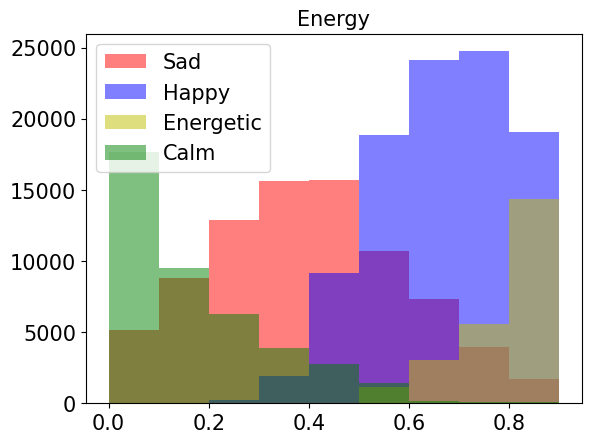

In [ ]:
min_energy = min(min(sad['energy']), min(happy['energy']), min(energetic['energy']), min(calm['energy']))
max_energy = max(max(sad['energy']), max(happy['energy']), max(energetic['energy']), max(calm['energy']))

bins_energy = np.arange(min_energy, max_energy, ((max_energy-min_energy)/10))

plt.figure()
plt.title('Energy',fontsize=15)

plt.hist(sad['energy'], bins=bins_energy, alpha = 0.5, color= 'r')

plt.hist(happy['energy'], bins=bins_energy, alpha = 0.5, color= 'b')

plt.hist(energetic['energy'], bins=bins_energy, alpha = 0.5, color= 'y')

plt.hist(calm['energy'], bins=bins_energy, alpha = 0.5, color= 'g')

plt.legend(('Sad', 'Happy', 'Energetic', 'Calm'),fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

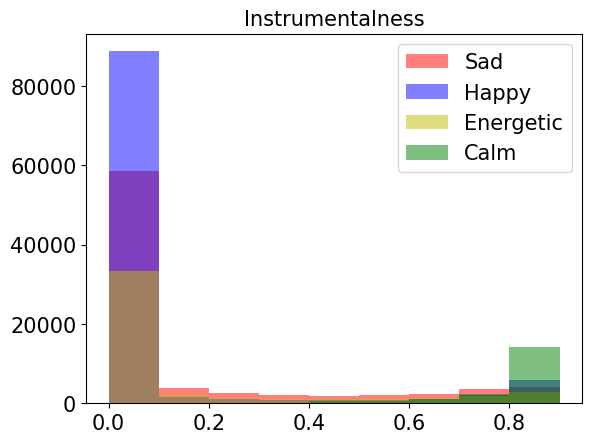

In [ ]:
min_instrumentalness = min(min(sad['instrumentalness']), min(happy['instrumentalness']), min(energetic['instrumentalness']), min(calm['instrumentalness']))
max_instrumentalness = max(max(sad['instrumentalness']), max(happy['instrumentalness']), max(energetic['instrumentalness']), max(calm['instrumentalness']))

bins_instrumentalness = np.arange(min_instrumentalness, max_instrumentalness, ((max_instrumentalness-min_instrumentalness)/10))

plt.figure()
plt.title('Instrumentalness',fontsize=15)

plt.hist(sad['instrumentalness'], bins=bins_instrumentalness, alpha = 0.5, color= 'r')

plt.hist(happy['instrumentalness'], bins=bins_instrumentalness, alpha = 0.5, color= 'b')

plt.hist(energetic['instrumentalness'], bins=bins_instrumentalness, alpha = 0.5, color= 'y')

plt.hist(calm['instrumentalness'], bins=bins_instrumentalness, alpha = 0.5, color= 'g')

plt.legend(('Sad', 'Happy', 'Energetic', 'Calm'),fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

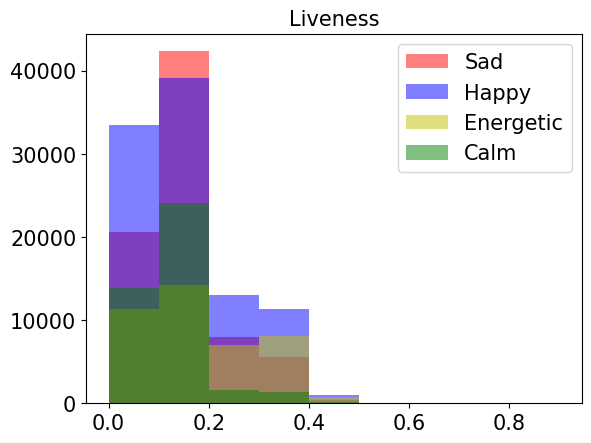

In [ ]:
min_liveness = min(min(sad['liveness']), min(happy['liveness']), min(energetic['liveness']), min(calm['liveness']))
max_liveness = max(max(sad['liveness']), max(happy['liveness']), max(energetic['liveness']), max(calm['liveness']))

bins_liveness = np.arange(min_liveness, max_liveness, ((max_liveness-min_liveness)/10))

plt.figure()
plt.title('Liveness',fontsize=15)

plt.hist(sad['liveness'], bins=bins_liveness, alpha = 0.5, color= 'r')

plt.hist(happy['liveness'], bins=bins_liveness, alpha = 0.5, color= 'b')

plt.hist(energetic['liveness'], bins=bins_liveness, alpha = 0.5, color= 'y')

plt.hist(calm['liveness'], bins=bins_liveness, alpha = 0.5, color= 'g')

plt.legend(('Sad', 'Happy', 'Energetic', 'Calm'),fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

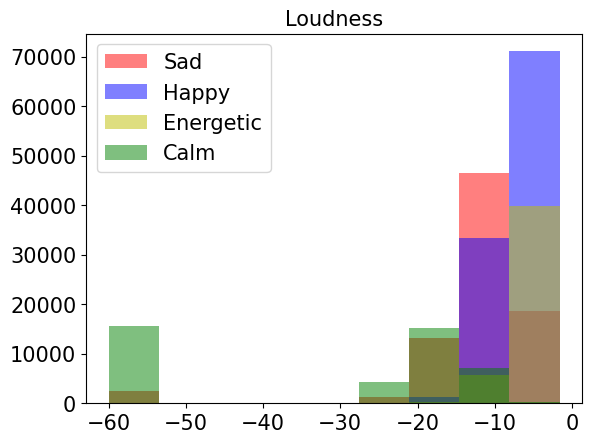

In [ ]:
min_loudness = min(min(sad['loudness']), min(happy['loudness']), min(energetic['loudness']), min(calm['loudness']))
max_loudness = max(max(sad['loudness']), max(happy['loudness']), max(energetic['loudness']), max(calm['loudness']))

bins_loudness = np.arange(min_loudness, max_loudness, ((max_loudness-min_loudness)/10))

plt.figure()
plt.title('Loudness',fontsize=15)

plt.hist(sad['loudness'], bins=bins_loudness, alpha = 0.5, color= 'r')

plt.hist(happy['loudness'], bins=bins_loudness, alpha = 0.5, color= 'b')

plt.hist(energetic['loudness'], bins=bins_loudness, alpha = 0.5, color= 'y')

plt.hist(calm['loudness'], bins=bins_loudness, alpha = 0.5, color= 'g')

plt.legend(('Sad', 'Happy', 'Energetic', 'Calm'),fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

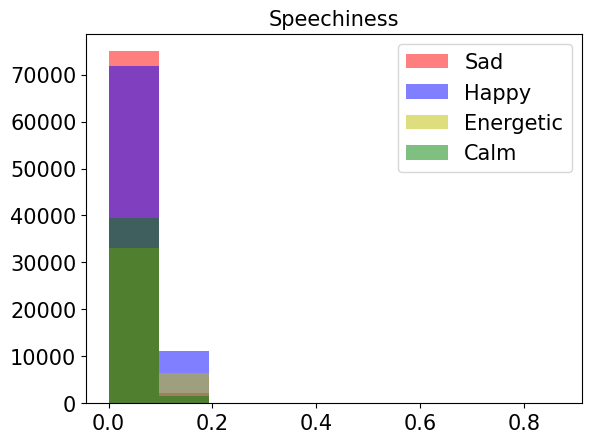

In [ ]:
min_speechiness = min(min(sad['speechiness']), min(happy['speechiness']), min(energetic['speechiness']), min(calm['speechiness']))
max_speechiness = max(max(sad['speechiness']), max(happy['speechiness']), max(energetic['speechiness']), max(calm['speechiness']))

bins_speechiness = np.arange(min_speechiness, max_speechiness, ((max_speechiness-min_speechiness)/10))

plt.figure()
plt.title('Speechiness',fontsize=15)

plt.hist(sad['speechiness'], bins=bins_speechiness, alpha = 0.5, color= 'r')

plt.hist(happy['speechiness'], bins=bins_speechiness, alpha = 0.5, color= 'b')

plt.hist(energetic['speechiness'], bins=bins_speechiness, alpha = 0.5, color= 'y')

plt.hist(calm['speechiness'], bins=bins_speechiness, alpha = 0.5, color= 'g')

plt.legend(('Sad', 'Happy', 'Energetic', 'Calm'),fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

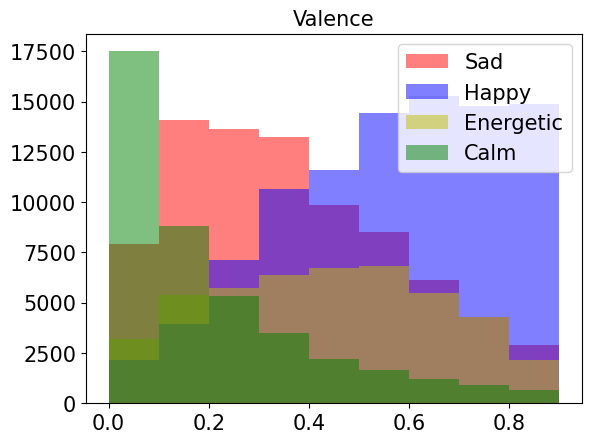

In [ ]:
min_valence = min(min(sad['valence']), min(happy['valence']), min(energetic['valence']), min(calm['valence']))
max_valence = max(max(sad['valence']), max(happy['valence']), max(energetic['valence']), max(calm['valence']))

bins_valence = np.arange(min_valence, max_valence, ((max_valence-min_valence)/10))

plt.figure()
plt.title('Valence',fontsize=15)

plt.hist(sad['valence'], bins=bins_valence, alpha = 0.5, color= 'r')

plt.hist(happy['valence'], bins=bins_valence, alpha = 0.5, color= 'b')

plt.hist(energetic['valence'], bins=bins_valence, alpha = 0.5, color= 'y')

plt.hist(calm['valence'], bins=bins_valence, alpha = 0.5, color= 'g')

plt.legend(('Sad', 'Happy', 'Energetic', 'Calm'),fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

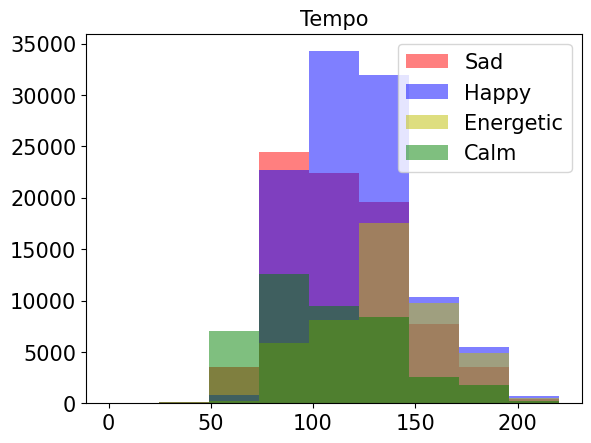

In [ ]:
min_tempo = min(min(sad['tempo']), min(happy['tempo']), min(energetic['tempo']), min(calm['tempo']))
max_tempo = max(max(sad['tempo']), max(happy['tempo']), max(energetic['tempo']), max(calm['tempo']))

bins_tempo = np.arange(min_tempo, max_tempo, ((max_tempo-min_tempo)/10))

plt.figure()
plt.title('Tempo',fontsize=15)

plt.hist(sad['tempo'], bins=bins_tempo, alpha = 0.5, color= 'r')

plt.hist(happy['tempo'], bins=bins_tempo, alpha = 0.5, color= 'b')

plt.hist(energetic['tempo'], bins=bins_tempo, alpha = 0.5, color= 'y')

plt.hist(calm['tempo'], bins=bins_tempo, alpha = 0.5, color= 'g')

plt.legend(('Sad', 'Happy', 'Energetic', 'Calm'),fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

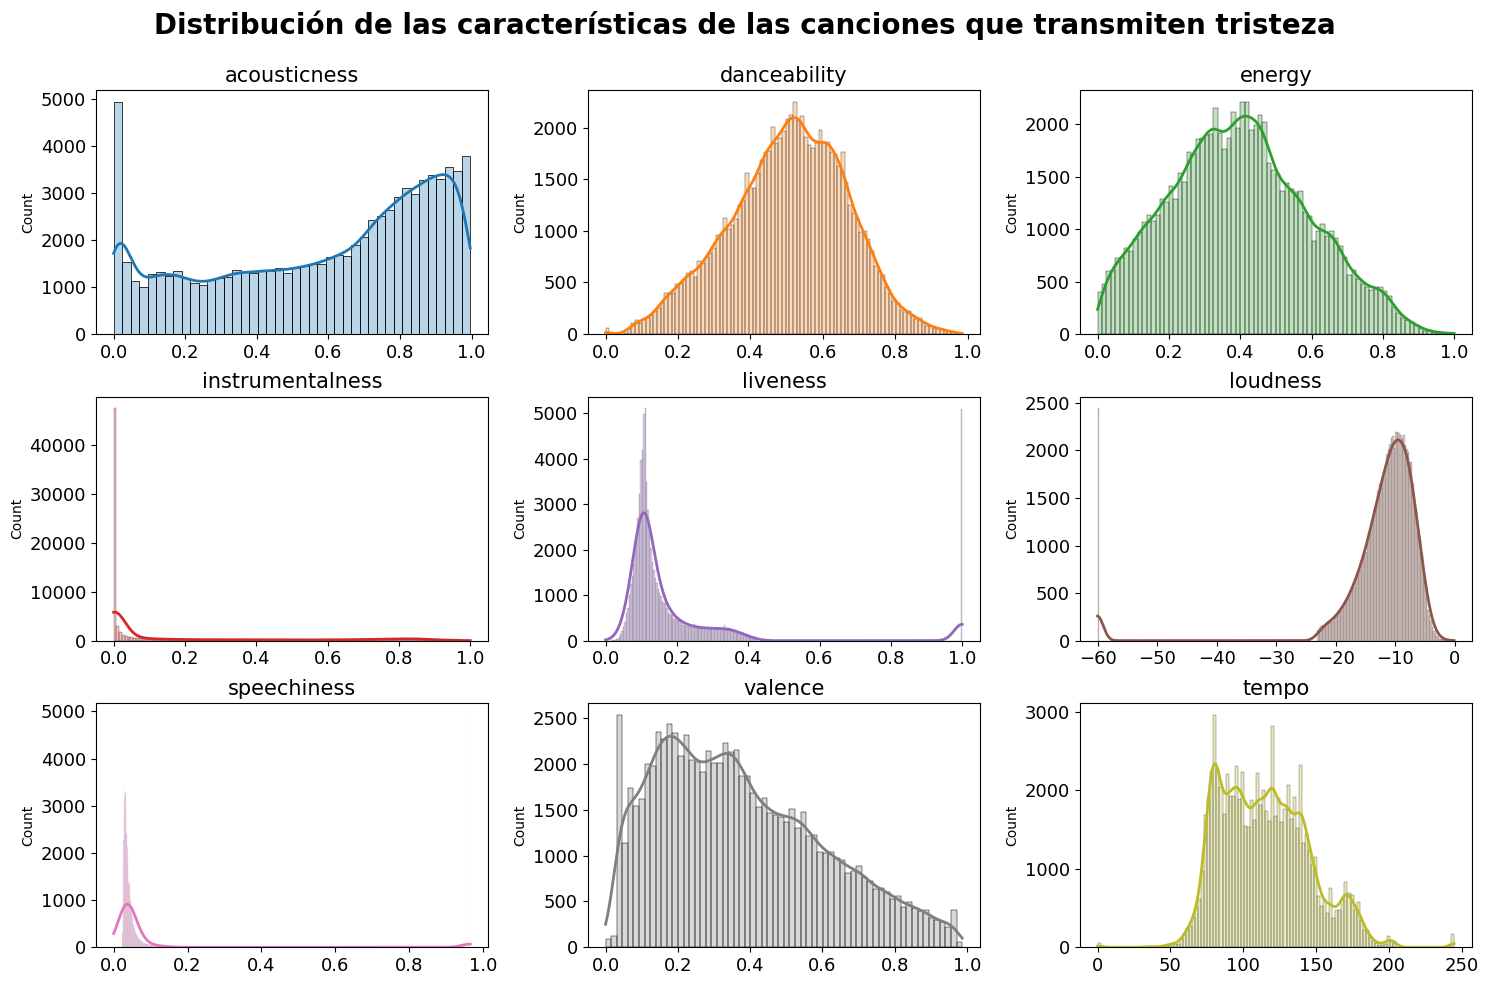

In [ ]:

import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columnas_numeric = sad.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = sad,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "light")
    axes[i].tick_params(labelsize = 13)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las características de las canciones que transmiten tristeza', fontsize = 20, fontweight = "bold");

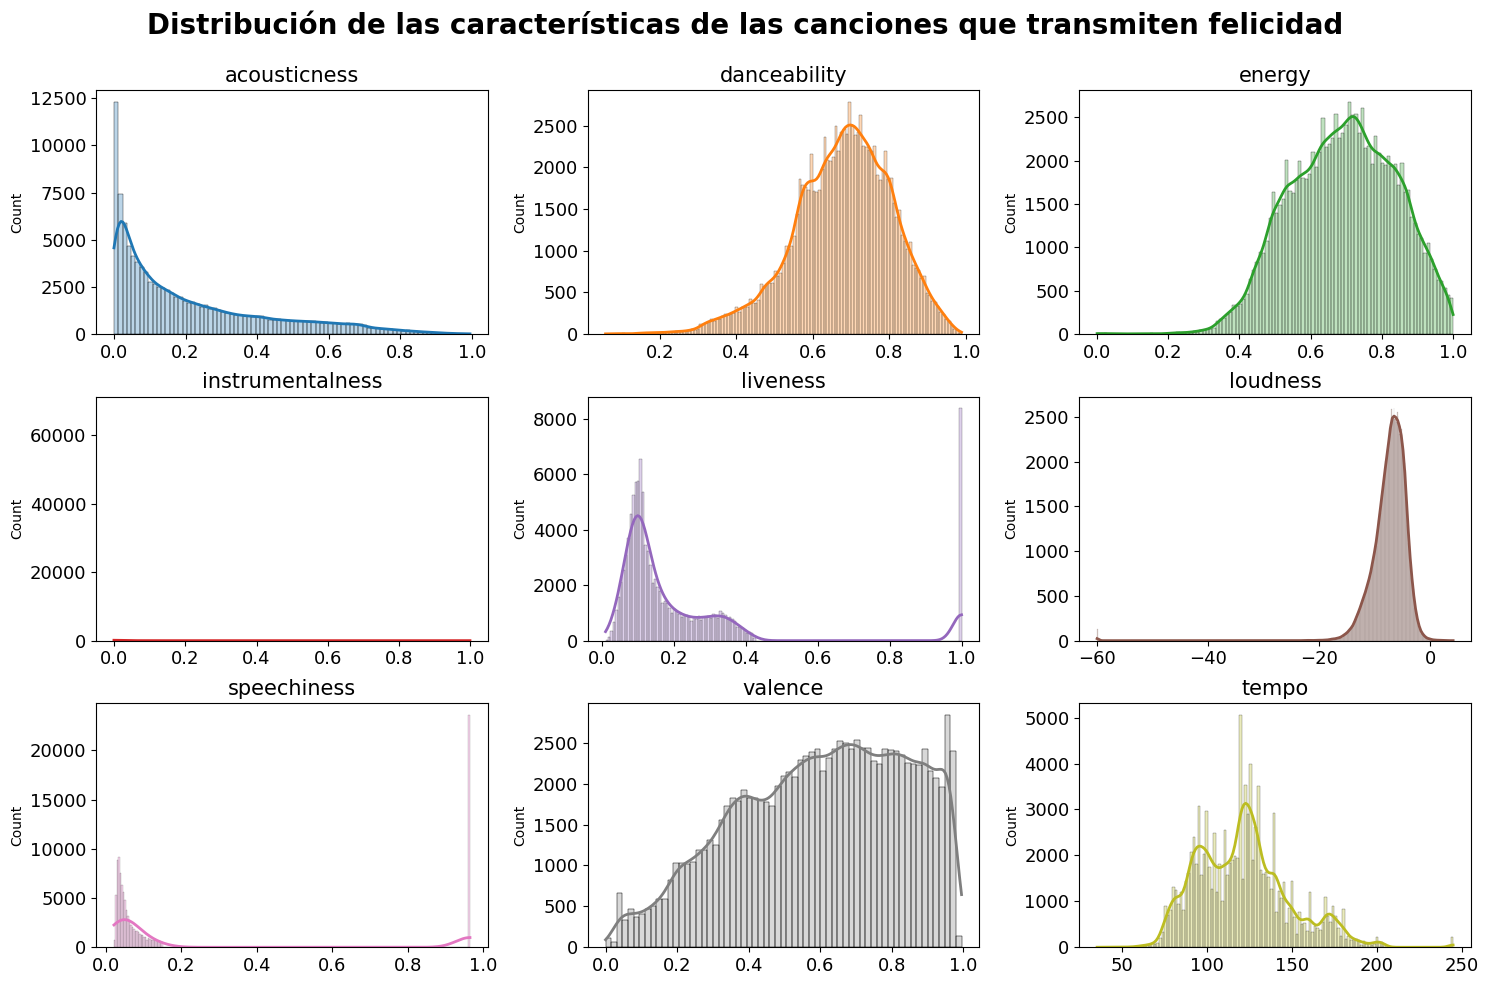

In [ ]:

import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columnas_numeric = happy.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = happy,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "light")
    axes[i].tick_params(labelsize = 13)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las características de las canciones que transmiten felicidad', fontsize = 20, fontweight = "bold");

# plt.savefig('distribución_izquierda5')

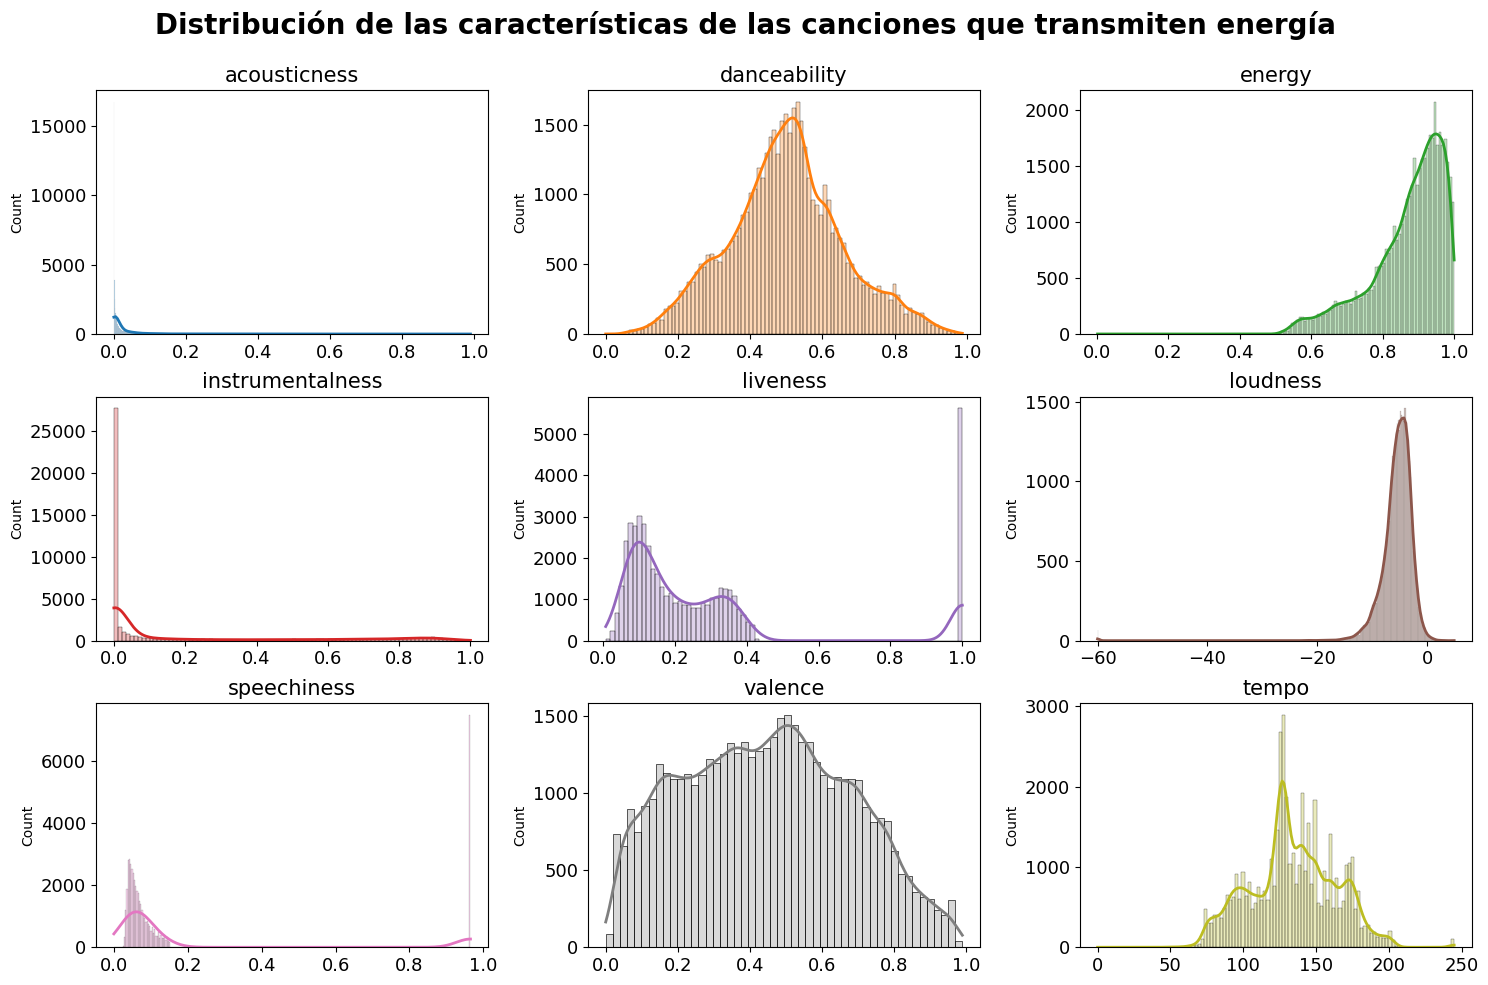

In [ ]:

import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columnas_numeric = energetic.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = energetic,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "light")
    axes[i].tick_params(labelsize = 13)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las características de las canciones que transmiten energía', fontsize = 20, fontweight = "bold");

# plt.savefig('distribución_izquierda5')

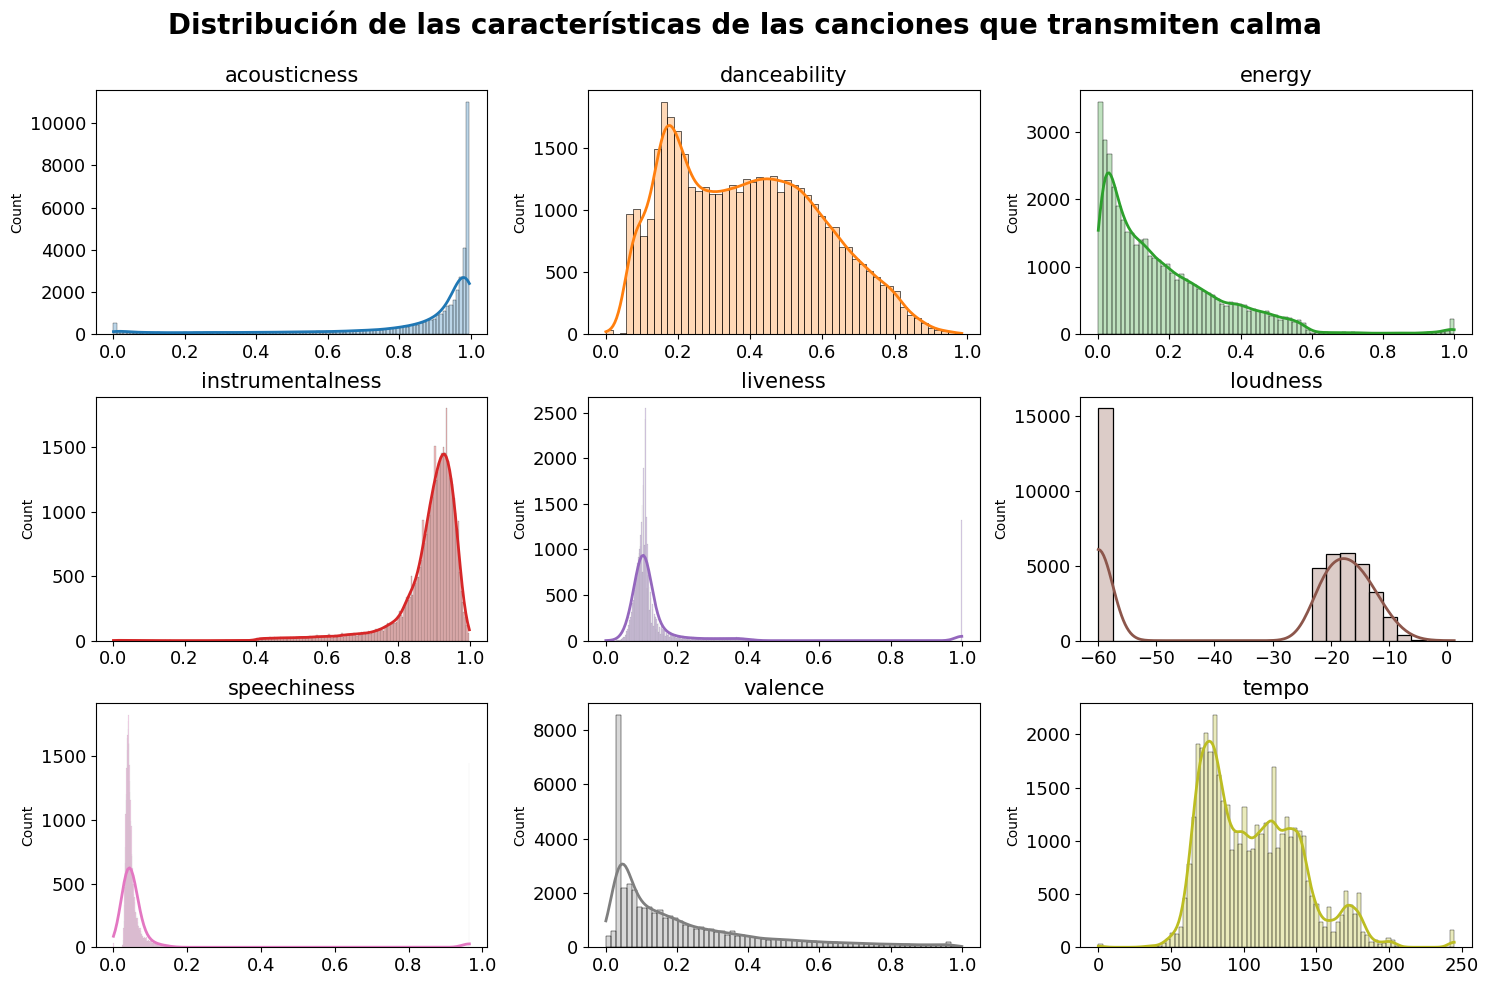

In [ ]:

import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columnas_numeric = calm.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = calm,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "light")
    axes[i].tick_params(labelsize = 13)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las características de las canciones que transmiten calma', fontsize = 20, fontweight = "bold");

# plt.savefig('distribución_izquierda5')

In [ ]:
import statsmodels.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
def lili(valor):
    caracteristicaa = []
    for i in range(len(modelos)):
        ca = statsmodels.stats.diagnostic.lilliefors(modelos[i][valor])
        caracteristicaa.append(ca)
    return caracteristicaa

In [ ]:
lili_dict = {feature : lili(feature) for feature in features}

In [ ]:
lili_dict

{'acousticness': [(0.11415963854424815, 0.0009999999999998899),
  (0.16262047597272639, 0.0009999999999998899),
  (0.37111933846502565, 0.0009999999999998899),
  (0.26216039095041876, 0.0009999999999998899)],
 'danceability': [(0.024673806728452707, 0.0009999999999998899),
  (0.034135119169743766, 0.0009999999999998899),
  (0.03469545093696247, 0.0009999999999998899),
  (0.07124625493397013, 0.0009999999999998899)],
 'energy': [(0.02093733726055519, 0.0009999999999998899),
  (0.02830707725112247, 0.0009999999999998899),
  (0.11268244839882724, 0.0009999999999998899),
  (0.1473578316604981, 0.0009999999999998899)],
 'instrumentalness': [(0.32882866075637596, 0.0009999999999998899),
  (0.4388570302500929, 0.0009999999999998899),
  (0.3296435831454433, 0.0009999999999998899),
  (0.1796543996563314, 0.0009999999999998899)],
 'liveness': [(0.27078868527334143, 0.0009999999999998899),
  (0.22149078381072868, 0.0009999999999998899),
  (0.20934973682392077, 0.0009999999999998899),
  (0.3391822

In [ ]:
from scipy import stats
import scipy.stats

kruskal_dict = {feature:scipy.stats.kruskal(modelos[0][feature], modelos[1][feature], modelos[2][feature], modelos[3][feature]) for feature in features}

In [ ]:
kruskal_dict

{'acousticness': KruskalResult(statistic=163331.6117811386, pvalue=0.0),
 'danceability': KruskalResult(statistic=87981.81319891626, pvalue=0.0),
 'energy': KruskalResult(statistic=184616.5982558381, pvalue=0.0),
 'instrumentalness': KruskalResult(statistic=106483.21368950163, pvalue=0.0),
 'liveness': KruskalResult(statistic=9049.862378595524, pvalue=0.0),
 'loudness': KruskalResult(statistic=153935.47356096515, pvalue=0.0),
 'speechiness': KruskalResult(statistic=47892.80817598492, pvalue=0.0),
 'valence': KruskalResult(statistic=74886.0464252628, pvalue=0.0),
 'tempo': KruskalResult(statistic=21682.05174140886, pvalue=0.0)}

In [ ]:
featuress = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

Text(0.5, 1.0, 'Ordenamiento descendente de importancia de características con Información Mútua')

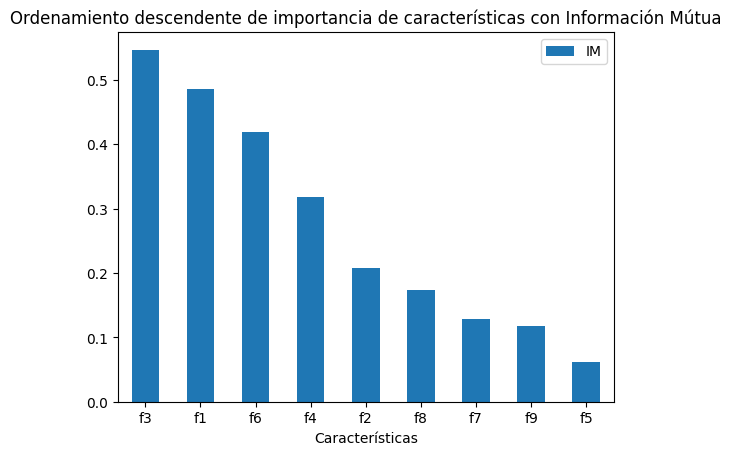

In [ ]:
# Selección de k características con Información Mútua
bestfeatures_MI = SelectKBest(score_func=mutual_info_classif(x_train, y_train, random_state = 0), k=9)

dfff = pd.DataFrame({'Características':featuress, 'IM':bestfeatures_MI.score_func})

df_ordenado = dfff.sort_values('IM', ascending=False)
ax = df_ordenado.plot.bar(x='Características', y='IM', rot=0)
plt.title("Ordenamiento descendente de importancia de características con Información Mútua")


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(dff.drop(columns = ['labels'] , axis = 1) , dff['labels'] , test_size = 0.3, random_state=10)

In [ ]:
from sklearn import preprocessing

scaler_all = preprocessing.StandardScaler().fit(x_train)
X_train_norm = scaler_all.transform(x_train)
X_test_norm = scaler_all.transform(x_test)

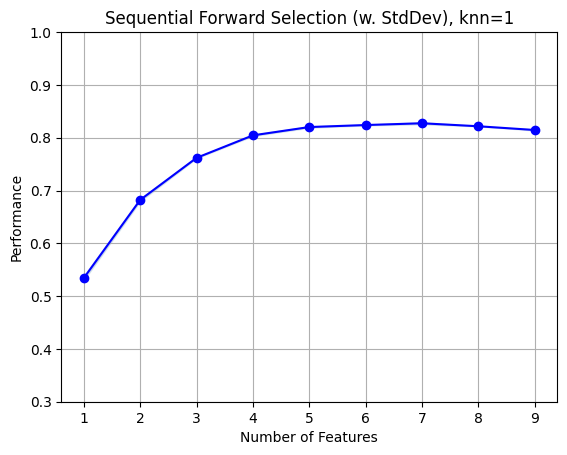

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.5393819774255227, 0.5337537778326035, 0.529...",0.534257,"(2,)",0.008989,0.003994,0.002824
2,"(2, 3)","[0.6803491025720101, 0.6805803984456917, 0.685...",0.682215,"(2, 3)",0.005574,0.002477,0.001751
3,"(1, 2, 3)","[0.7627212730524887, 0.7608554863381237, 0.762...",0.761883,"(1, 2, 3)",0.001741,0.000773,0.000547
4,"(0, 1, 2, 3)","[0.8044933078393881, 0.8059427619811262, 0.802...",0.804478,"(0, 1, 2, 3)",0.002706,0.001202,0.00085
5,"(0, 1, 2, 3, 6)","[0.8206685992721889, 0.8214858446925307, 0.818...",0.820216,"(0, 1, 2, 3, 6)",0.002841,0.001262,0.000893
6,"(0, 1, 2, 3, 6, 7)","[0.8242922346265342, 0.8246314685746007, 0.823...",0.82402,"(0, 1, 2, 3, 6, 7)",0.001441,0.00064,0.000453
7,"(0, 1, 2, 3, 5, 6, 7)","[0.8273299204342195, 0.8297508172454203, 0.825...",0.827392,"(0, 1, 2, 3, 5, 6, 7)",0.004279,0.001902,0.001345
8,"(0, 1, 2, 3, 5, 6, 7, 8)","[0.8215166841423549, 0.8218250786405971, 0.821...",0.821702,"(0, 1, 2, 3, 5, 6, 7, 8)",0.0003,0.000133,0.000094
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.8148091038055881, 0.8155800900511935, 0.813...",0.814619,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.001964,0.000873,0.000617


In [ ]:

valor_k = 1
knn = KNeighborsClassifier(n_neighbors=valor_k)
sfs = SFS(knn,
           k_features=9,
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=3)

sfs = sfs.fit(X_train_norm, y_train)


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 1])
plt.title('Sequential Forward Selection (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T

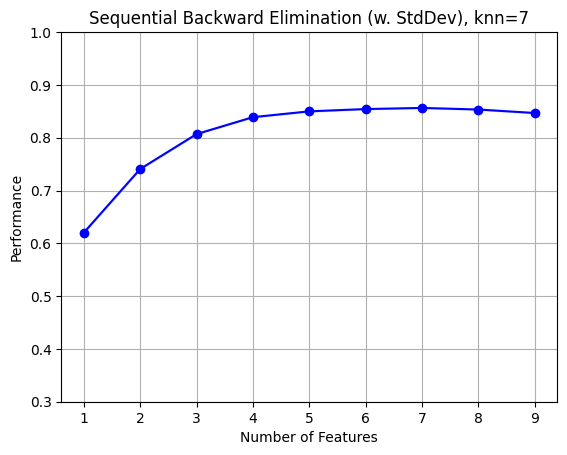

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.847051748596805, 0.8477918953925861, 0.8457...",0.846851,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.001939,0.000862,0.000609
8,"(0, 1, 2, 3, 5, 6, 7, 8)","[0.8525257509406032, 0.8541910812311109, 0.853...",0.85341,"(0, 1, 2, 3, 5, 6, 7, 8)",0.001539,0.000684,0.000483
7,"(0, 1, 2, 3, 5, 6, 7)","[0.8565348794177512, 0.8570128908900265, 0.855...",0.856432,"(0, 1, 2, 3, 5, 6, 7)",0.001173,0.000521,0.000369
6,"(0, 1, 2, 3, 6, 7)","[0.8542835995805835, 0.8546999321532104, 0.853...",0.854289,"(0, 1, 2, 3, 6, 7)",0.000751,0.000334,0.000236
5,"(0, 1, 2, 3, 6)","[0.8510146178992167, 0.8502590513785234, 0.848...",0.849987,"(0, 1, 2, 3, 6)",0.002183,0.00097,0.000686
4,"(0, 1, 2, 3)","[0.8388021957688275, 0.8399432554123234, 0.838...",0.838956,"(0, 1, 2, 3)",0.001689,0.000751,0.000531
3,"(1, 2, 3)","[0.8061123789551594, 0.8081015234688214, 0.806...",0.806909,"(1, 2, 3)",0.001933,0.000859,0.000607
2,"(2, 3)","[0.7417967063467588, 0.7409332017516808, 0.739...",0.74081,"(2, 3)",0.001937,0.000861,0.000609
1,"(2,)","[0.6193795102695367, 0.6199037809165484, 0.621...",0.620212,"(2,)",0.001878,0.000835,0.00059


In [ ]:
# Sequential Backward Selection
valor_k = 7
knn = KNeighborsClassifier(n_neighbors=valor_k)

sbs = SFS(knn,
          k_features=1,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=3)
sbs = sbs.fit(X_train_norm, y_train)



fig4 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 1])
plt.title('Sequential Backward Elimination (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sbs.get_metric_dict()).T

Feature ranking:
1. Característica 2 (0.211015)
2. Característica 3 (0.202309)
3. Característica 0 (0.198716)
4. Característica 1 (0.112327)
5. Característica 5 (0.078616)
6. Característica 7 (0.077168)
7. Característica 6 (0.057955)
8. Característica 8 (0.034874)
9. Característica 4 (0.027019)


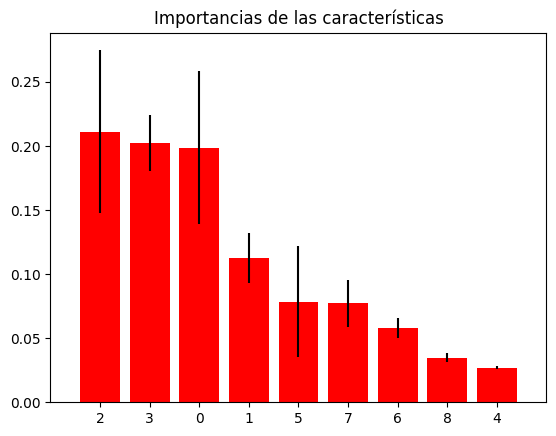

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de 250 árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles no es necesario que las características estén normalizadas, trabajamos con x_train y x_test (no con las versiones estandarizadas)
forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Importancias de las características")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [ ]:
def particion(data_, frac):

  datos_por_ciento = data_.sample(frac=frac*0.01, random_state=42)

  # Guardar en Google Drive
  datos_por_ciento.to_csv(f'/content/drive/MyDrive/TFM/datos_{frac}_por_ciento_o.csv', index=False)
  return datos_por_ciento

In [ ]:
dff.to_csv(f'/content/drive/MyDrive/TFM/datos_100_por_ciento.csv', index=False)
ruta_archivo = '/content/drive/MyDrive/TFM/datos_100_por_ciento.csv'
datos_100_por_ciento = pd.read_csv(ruta_archivo)
datos_100_por_ciento

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,labels
0,0.01690,0.611,0.614,0.000794,1.0000,-8.815,0.0672,0.520,128.050,2
1,0.01180,0.638,0.781,0.009530,0.3490,-6.848,0.0285,0.250,122.985,1
2,0.00710,0.560,0.810,0.000008,0.2410,-8.029,0.0872,0.247,170.044,1
3,0.01780,0.525,0.699,0.000088,0.0888,-4.571,0.0353,0.199,92.011,0
4,0.36500,0.367,0.771,0.000001,0.0965,-5.863,0.1060,0.163,115.917,1
...,...,...,...,...,...,...,...,...,...,...
277933,0.12600,0.777,0.725,0.010800,0.0917,-9.012,0.0470,0.851,128.349,1
277934,0.08530,0.543,0.482,0.000092,0.1110,-12.789,0.9650,0.415,193.513,1
277935,0.01150,0.527,0.942,0.000000,0.1880,-5.640,0.0366,0.495,148.723,2
277936,0.09640,0.768,0.829,0.000029,0.0970,-5.109,0.0313,0.962,118.773,1
